<a href="https://colab.research.google.com/github/bridgetmanu/Biodiversity/blob/main/source%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read file and familiarize with the content

In [69]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import sqlite3

data1 = pd.read_csv("/content/observations.csv")
data2 = pd.read_csv("/content/species_info.csv")

# clean data
# remove NA values
data1 = data1.dropna()
data2 = data2.dropna()

# view dataframe
pd.DataFrame(data1)
pd.DataFrame(data2)


sql = sqlite3.connect("species_info.db")
data2.to_sql("species_info", sql, if_exists = "replace")
con = sql.cursor()

#Use sql to query the DataFrame

def sqlquery(status):
    obs1 = pd.read_sql_query("SELECT * FROM species_info where conservation_status = '" + status + "'", sql)
    obs2 = pd.DataFrame(obs1)
    return obs2
# about 10 of the species in the dataframe are threatened
# about 16 of the species in the dataframe are Endangered

status = input("Enter a conservation status: ")
sqlquery(status)




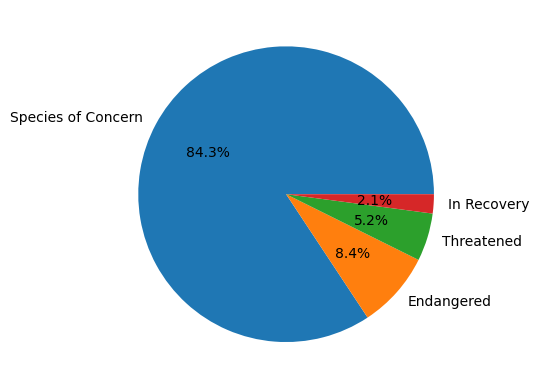

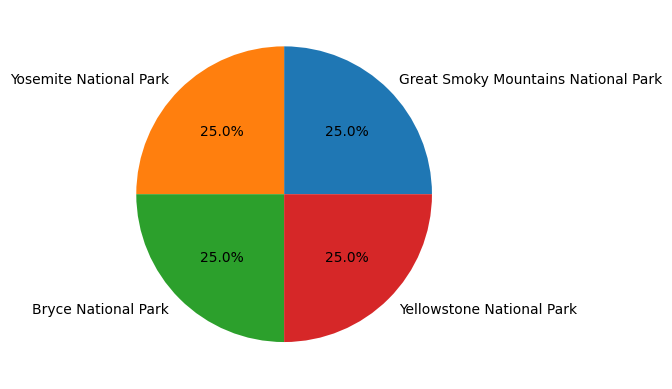

In [36]:
import matplotlib.pyplot as plt

# Pie Chart of Conservation Status in the parks

plt.pie(data2['conservation_status'].value_counts(), labels=data2['conservation_status'].unique(), autopct='%1.1f%%')
plt.show()

plt.pie(data1['park_name'].value_counts(), labels=data1['park_name'].unique(), autopct='%1.1f%%')
plt.show()


About 84.3% of animals in the park are species of concern;
About 8.4% of the animals are endangered; 5.2% are threatened and 2.1% are in recovery.

There are equal amount of observations from each park


	Are certain types of species more likely to be endangered?
Cannis Lupus (Grey Wolf) are more likely to be endangered;
followed by Cannis rufus (Red Wolf);
Myotis grisescens (Gray Myotis)

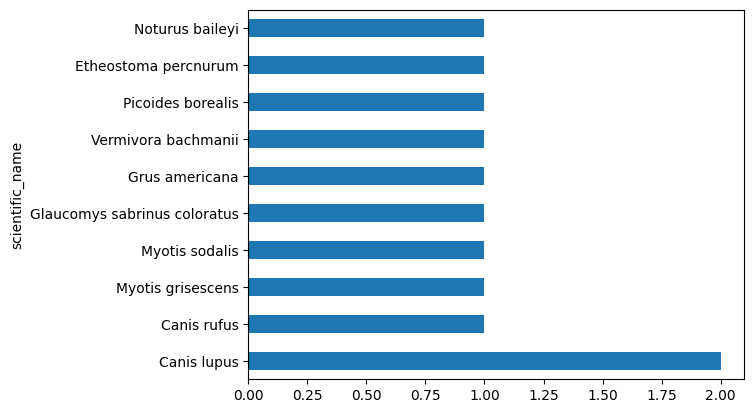

,index,category,scientific_name,common_names,conservation_status
0,8,Mammal,Canis lupus,Gray Wolf,Endangered
1,9,Mammal,Canis rufus,Red Wolf,Endangered
2,34,Mammal,Myotis grisescens,Gray Myotis,Endangered
3,39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered
4,72,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered
5,173,Bird,Grus americana,Whooping Crane,Endangered
6,276,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
7,343,Bird,Picoides borealis,Red-Cockaded Woodpecker,Endangered
8,540,Fish,Etheostoma percnurum,Duskytail Darter,Endangered
9,570,Fish,Noturus baileyi,Smoky Madtom,Endangered


In [15]:
def sqlquery(status):
    obs = pd.read_sql_query("SELECT * FROM species_info where conservation_status = '" + status + "'", sql)
    obs3 = pd.DataFrame(obs)
    top_5 = obs3['scientific_name'].value_counts().nlargest(10)
    top_5.plot(kind='barh')
    plt.show()
    return obs3

sqlquery(status="Endangered")



Are the differences between species and their conservation status
significant?

yes they are



W






	which species were spotted the most at each park?
**Yellowstone NP**

Lycopodium tristachyum

**GSMNP**

Sonchus asper ssp. asper

**BNP**

Valerianella radiata

**YNP**

Ivesia shockleyi var. shockleyi



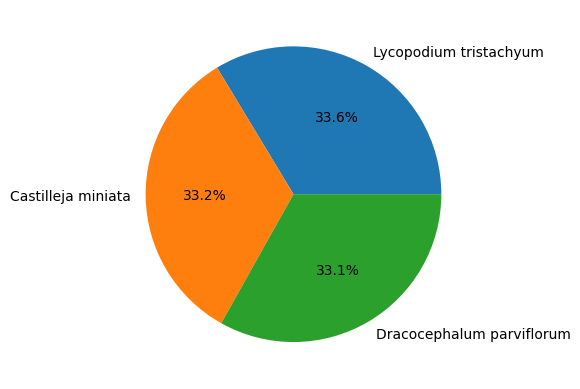

,index,scientific_name,park_name,observations
0,11281,Lycopodium tristachyum,Yellowstone National Park,321
1,1168,Castilleja miniata,Yellowstone National Park,317
2,8749,Dracocephalum parviflorum,Yellowstone National Park,316


In [72]:
sql1 = sqlite3.connect("observations.db")
data1.to_sql("observations", sql1, if_exists = "replace")
con = sql1.cursor()

def sqlquery(park):
    obs = pd.read_sql_query("SELECT * FROM observations where park_name = '" + park + "' order by observations DESC  limit 3", sql1)
    obs3 = pd.DataFrame(obs)
    top_5 = obs3['observations']
    top_5.plot(kind='pie', autopct='%1.1f%%', labels=obs3['scientific_name'])
    plt.ylabel("") # removes the column heading from the pie chart
    plt.show()
    return obs3

sqlquery(park="Yosemite National Park")
sqlquery(park="Bryce National Park")
sqlquery(park="Great Smoky Mountains National Park")
sqlquery(park="Yellowstone National Park")


# Yosemite National Park
# Bryce National Park
# Great Smoky Mountains National Park
# Yellowstone National Park

Figure out the common names of the species most sighted at each park


In [74]:
# join both tables

obs_data=pd.read_sql_query("SELECT * FROM observations order by observations DESC", sql1)
species_data=pd.read_sql_query("SELECT * FROM species_info", sql)

merged_data = pd.merge(obs_data, species_data, on='scientific_name', how='outer')
merged_data







,index_x,scientific_name,park_name,observations,index_y,category,common_names,conservation_status
0,11281,Lycopodium tristachyum,Yellowstone National Park,321,NaN,NaN,NaN,NaN
1,19149,Lycopodium tristachyum,Yosemite National Park,196,NaN,NaN,NaN,NaN
2,2859,Lycopodium tristachyum,Bryce National Park,122,NaN,NaN,NaN,NaN
3,14714,Lycopodium tristachyum,Great Smoky Mountains National Park,90,NaN,NaN,NaN,NaN
4,1168,Castilleja miniata,Yellowstone National Park,317,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
23403,18558,Vermivora bachmanii,Great Smoky Mountains National Park,18,276.0,Bird,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
23404,10848,Grus americana,Yellowstone National Park,57,173.0,Bird,Whooping Crane,Endangered
23405,20342,Grus americana,Yosemite National Park,37,173.0,Bird,Whooping Crane,Endangered
23406,13745,Grus americana,Bryce National Park,24,173.0,Bird,Whooping Crane,Endangered
